In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

dataset = pd.read_csv('Exasens.csv').iloc[2:, [0,2,3,4,5,6, 7, 8]]
dataset.rename(columns={"Imaginary Part":"I_min","Unnamed: 3":"I_max","Real Part":"Real_min","Unnamed: 5":"Real_max"}, inplace=True)
dataset["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
dataset["Smoking"].replace({1:"Non-smoker",2:"Ex-smoker",3:"Active-smoker"}, inplace=True)
print(dataset)

    Diagnosis    I_min         I_max Real_min      Real_max  Gender   Age  \
2        COPD  -320.61  -300.5635307  -495.26  -464.1719907    Male  77.0   
3        COPD  -325.39  -314.7503595  -473.73  -469.2631404  Female  72.0   
4        COPD     -323  -317.4360556  -476.12  -471.8976667    Male  73.0   
5        COPD  -327.78  -317.3996698  -473.73   -468.856388    Male  76.0   
6        COPD  -325.39  -316.1557853  -478.52  -472.8697828  Female  65.0   
..        ...      ...           ...      ...           ...     ...   ...   
396  Infected      NaN           NaN      NaN           NaN  Female  49.0   
397  Infected      NaN           NaN      NaN           NaN  Female  37.0   
398  Infected      NaN           NaN      NaN           NaN  Female  29.0   
399  Infected      NaN           NaN      NaN           NaN    Male  51.0   
400  Infected      NaN           NaN      NaN           NaN  Female  40.0   

           Smoking  
2        Ex-smoker  
3        Ex-smoker  
4    Active-

In [116]:


imputer= SimpleImputer(missing_values =np.nan, strategy='mean')  

imputerimputer= imputer.fit(dataset.iloc[:, [1,2,3,4]])  
  
dataset.iloc[:, [1,2,3,4]]= imputer.transform(dataset.iloc[:, [1,2,3,4]]) 

print(dataset)

    Diagnosis     I_min       I_max  Real_min    Real_max  Gender   Age  \
2        COPD -320.6100 -300.563531 -495.2600 -464.171991    Male  77.0   
3        COPD -325.3900 -314.750360 -473.7300 -469.263140  Female  72.0   
4        COPD -323.0000 -317.436056 -476.1200 -471.897667    Male  73.0   
5        COPD -327.7800 -317.399670 -473.7300 -468.856388    Male  76.0   
6        COPD -325.3900 -316.155785 -478.5200 -472.869783  Female  65.0   
..        ...       ...         ...       ...         ...     ...   ...   
396  Infected -314.9418 -304.779677 -473.0022 -458.701666  Female  49.0   
397  Infected -314.9418 -304.779677 -473.0022 -458.701666  Female  37.0   
398  Infected -314.9418 -304.779677 -473.0022 -458.701666  Female  29.0   
399  Infected -314.9418 -304.779677 -473.0022 -458.701666    Male  51.0   
400  Infected -314.9418 -304.779677 -473.0022 -458.701666  Female  40.0   

           Smoking  
2        Ex-smoker  
3        Ex-smoker  
4    Active-smoker  
5        Ex-smo

In [117]:
dataset.describe(include='all')

,Diagnosis,I_min,I_max,Real_min,Real_max,Gender,Age,Smoking
count,399,399.000000,399.000000,399.000000,399.000000,399,399.000000,399
unique,4,NaN,NaN,NaN,NaN,2,NaN,3
top,HC,NaN,NaN,NaN,NaN,Female,NaN,Non-smoker
freq,160,NaN,NaN,NaN,NaN,240,NaN,179
mean,NaN,-314.941800,-304.779677,-473.002200,-458.701666,NaN,48.736842,NaN
std,NaN,14.175624,12.884662,24.443262,21.807672,NaN,18.566962,NaN
min,NaN,-337.350000,-328.280985,-626.860000,-473.928698,NaN,17.000000,NaN
25%,NaN,-314.941800,-304.779677,-473.002200,-458.701666,NaN,31.000000,NaN
50%,NaN,-314.941800,-304.779677,-473.002200,-458.701666,NaN,49.000000,NaN
75%,NaN,-314.941800,-304.779677,-473.002200,-458.701666,NaN,64.000000,NaN


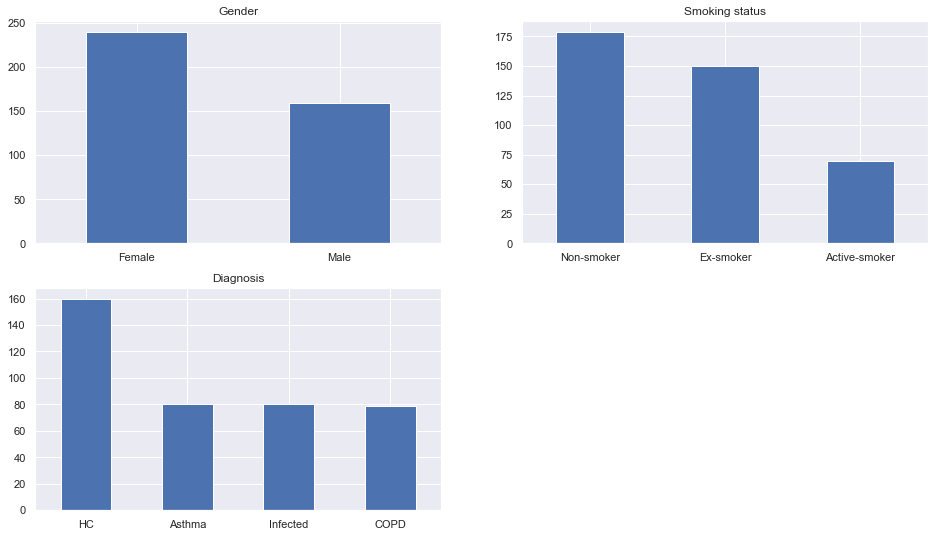

In [118]:
plt.subplot(221)

dataset['Gender'].value_counts().plot(kind='bar', title='Gender', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

dataset['Smoking'].value_counts().plot(kind='bar', title='Smoking status')

plt.xticks(rotation=0)

plt.subplot(223)

dataset['Diagnosis'].value_counts().plot(kind='bar', title='Diagnosis')

plt.xticks(rotation=0)

plt.show()

d:\gabri\Documents\GitHub\CS176-Project\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

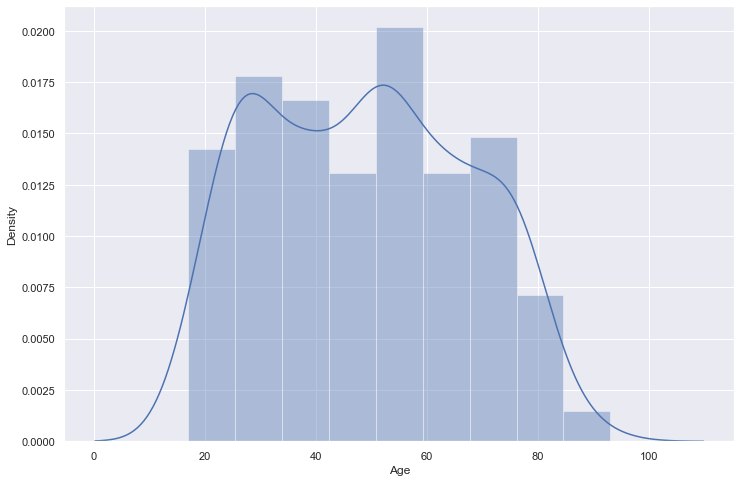

In [119]:
sns.distplot(dataset['Age'])

<AxesSubplot:>

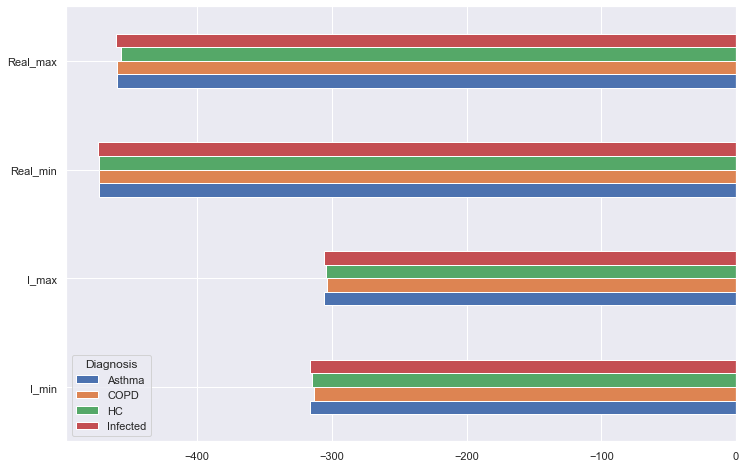

In [120]:
dataset.groupby('Diagnosis')[['I_min','I_max','Real_min','Real_max']].mean().T.plot(kind='barh',figsize=(12,8))



<AxesSubplot:xlabel='Diagnosis', ylabel='Age'>

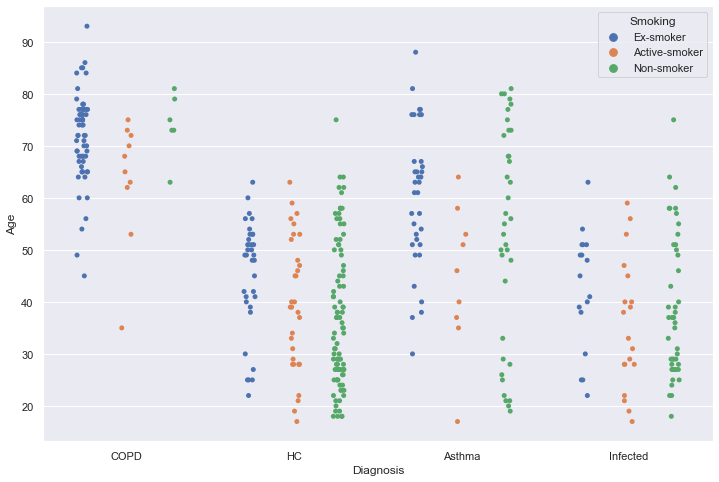

In [123]:

sns.stripplot(x='Diagnosis',hue='Smoking',y="Age", data=dataset, jitter=True, dodge=True)

<AxesSubplot:xlabel='Diagnosis', ylabel='Count'>

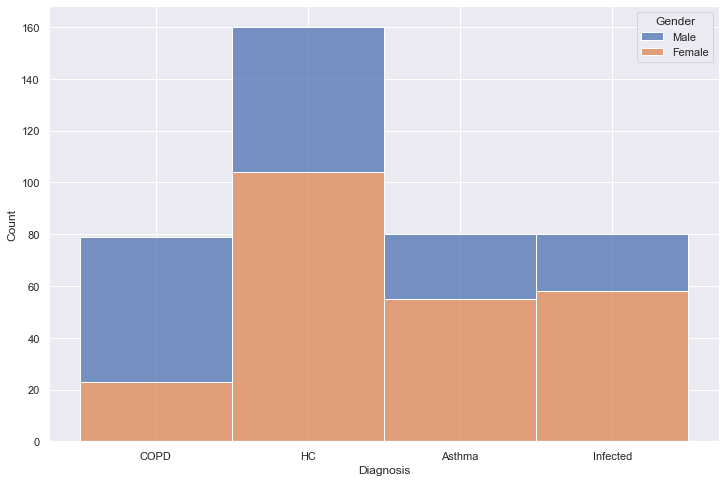

In [124]:
sns.histplot(x="Diagnosis",hue = "Gender",stat="count",data=dataset,multiple="stack")